# Prosper Loan Data Analysis
## by Lia Anggraeni

## Investigation Overview

> This document aims to show which parameters are correlated with the potential for being charged off of a loan.

## Dataset Overview

> The original dataset contained 113937 rows and 81 columns. However, for the purposes of analysis, I only use 50066 data consisting of 8. Variables consist of categorical variables and numeric variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('prosperLoanData_new1.csv')
df_loan2 = pd.read_csv('prosperLoanData_new2.csv')

In [3]:
def ratio(dataset, col1, col2):
    ratio_count = dataset.groupby([col1, col2]).size().unstack().add_prefix('count_')
    ratio_count['chargedoff_percent'] = (ratio_count.count_0 / ratio_count.sum(1)) * 100
    ratio_count.reset_index(inplace=True)
    return ratio_count

credit_grade = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'] # NC no grade
cgrade = pd.api.types.CategoricalDtype(ordered=True, categories=credit_grade)
df_loan2['CreditGrade'] = df_loan2['CreditGrade'].astype(cgrade)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## 23% of the loan has been charged off

> From the observations of 50066 prosper loan data, 23% of the loan data has been charged off. Meanwhile, completed loans amounted to 76%.

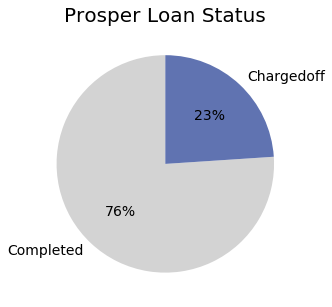

In [4]:
data = df_loan.LoanStatus.value_counts()
plt.figure(figsize=(5, 5))
plt.pie(data, labels=['Completed', 'Chargedoff'], autopct='%1d%%', startangle=90, 
        textprops={'fontsize': 14}, colors=['lightgray','#6073B1'])
plt.title('Prosper Loan Status', fontsize=20);

## The relationship credit grade with charged off percentage

> To see the relationship percentage of charged off with other parameters I took a sample of 11541 from the data with loan status completed and also took a sample with the same amount of data for data that has a chargedoff status.

> Can be seen on the bar chart, the better the credit grade the smaller the value percentage of charged off. HR credit grade has the largest percentage of charged off, with a 74% charged off percentage. While the lowest charged off percentage is owned by AA credit grade with a percentage value of 26%


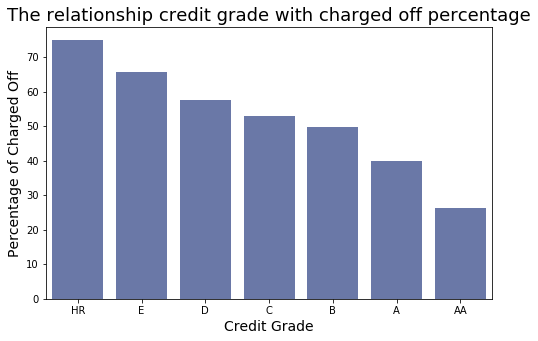

In [5]:
base_color = '#6073B1'
plt.figure(figsize=(8, 5))
data = ratio(df_loan2, 'CreditGrade', 'LoanStatus')
sns.barplot(data=data, x='CreditGrade', y='chargedoff_percent', 
            color=base_color)
plt.title('The relationship credit grade with charged off percentage', fontsize=18)
plt.xlabel(xlabel='Credit Grade', fontsize=14)
plt.ylabel('Percentage of Charged Off', fontsize=14);

## The relationship prosper score with percentage of charged off

> Overall, the greater the value of the prosper score, the smaller the percentage charged off. The largest percentage of charged off is owned by the prosper score 1 with a value of 67%, where the prosper score 1 is the smallest prosper score.

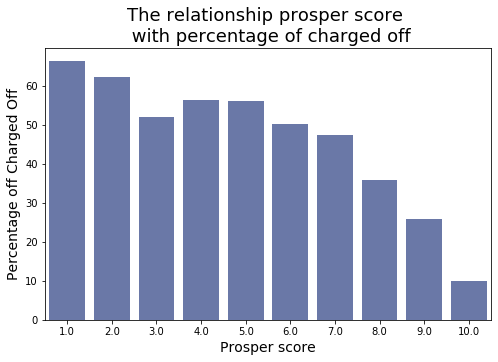

In [6]:
data = ratio(df_loan2, 'ProsperScore', 'LoanStatus')
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='ProsperScore', y='chargedoff_percent', 
            color=base_color)
plt.title('The relationship prosper score \n with percentage of charged off', fontsize=18)
plt.xlabel(xlabel='Prosper score', fontsize=14)
plt.ylabel('Percentage off Charged Off', fontsize=14)
plt.xlim(-0.5, 9.5);

## The relationship between estimated loss, prosper score, and percentage of charged off

Overall EstimatedLoss and chargedoff_percent have almost the same trend data on each prosper score. The greater the value of the prosper score the smaller the estimated loss value. Likewise with the charged off percentage, the greater the prosper score the smaller the value of the charged off percentage.

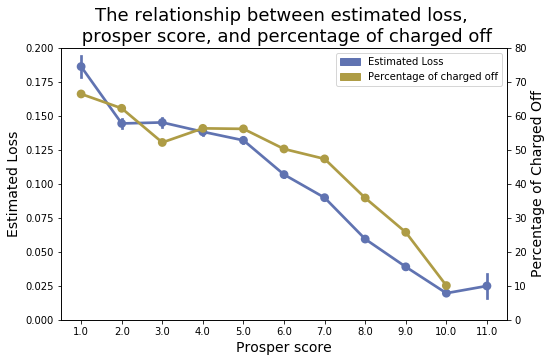

In [7]:
data = ratio(df_loan2, 'ProsperScore', 'LoanStatus')
fig, ax1 = plt.subplots(figsize=(8, 5))
bar1 = sns.pointplot(data=df_loan2, x='ProsperScore', y='EstimatedLoss', ax=ax1,
             color=base_color, label='Estimated Loss')
ax1.set_ylim(0, 0.2)
ax2 = ax1.twinx()
bar2 = sns.pointplot(data=data, x='ProsperScore', y='chargedoff_percent', ax=ax2,
             color='#AE9C45', label='Percentage of charged off')
ax2.set_ylim(0, 80)
plt.title('The relationship between estimated loss, \n prosper score, and percentage of charged off', fontsize=18)
ax1.set_xlabel('Prosper score', fontsize=14)
ax1.set_ylabel('Estimated Loss', fontsize=14)
ax2.set_ylabel('Percentage of Charged Off', fontsize=14)

import matplotlib.patches as mpatches
patch1 = mpatches.Patch(color=base_color, label='Estimated Loss')
patch2 = mpatches.Patch(color='#AE9C45', label='Percentage of charged off')

plt.legend(handles=[patch1, patch2]);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!